In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from matplotlib import pyplot
from matplotlib.pyplot import imread
from traitlets import Float

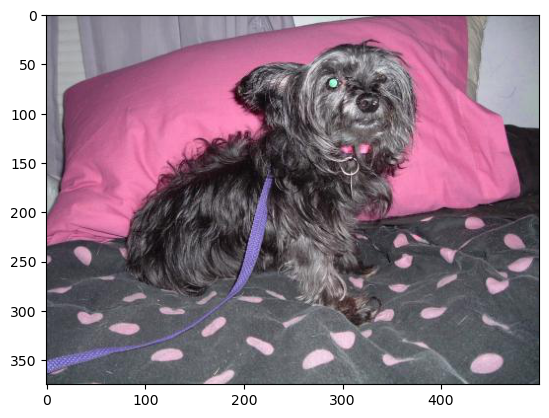

In [20]:
image = imread('./PetImages/test/dog/0.jpg')
pyplot.imshow(image)
pyplot.show()

In [21]:
from tensorflow.keras import models, layers

train_dir = './PetImages/train'
test_dir = './PetImages/test'

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range= 0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=20, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=20, class_mode='binary')

history = model.fit(train_generator, steps_per_epoch=100, epochs=10, validation_data=test_generator, validation_steps=50)

Found 24800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 10s 93ms/step - loss: 0.5710 - accuracy: 0.7150 - val_loss: 0.5009 - val_accuracy: 0.7600
Epoch 2/10
100/100 [==============================] - 9s 87ms/step - loss: 0.5603 - accuracy: 0.7020
Epoch 3/10
100/100 [==============================] - 9s 92ms/step - loss: 0.5531 - accuracy: 0.7155
Epoch 4/10
100/100 [==============================] - 9s 88ms/step - loss: 0.5397 - accuracy: 0.7320
Epoch 5/10
100/100 [==============================] - 9s 94ms/step - loss: 0.5257 - accuracy: 0.7330
Epoch 6/10
100/100 [==============================] - 9s 88ms/step - loss: 0.5394 - accuracy: 0.7300
Epoch 7/10
100/100 [==============================] - 9s 91ms/step - loss: 0.5277 - accuracy: 0.7315
Epoch 8/10
100/100 [==============================] - 9s 86ms/step - loss: 0.5180 - accuracy: 0.7360
Epoch 9/10
100/100 [==============================] - 8s 81ms/ste

2024-11-05 15:40:05.943194: W tensorflow/core/framework/op_kernel.cc:1816] UNKNOWN: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x397cd4720>
Traceback (most recent call last):

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    ret = func(*args)

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/Users/tommyhong/an

UnknownError: Graph execution error:

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x397cd4720>
Traceback (most recent call last):

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    ret = func(*args)

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/keras/src/engine/data_adapter.py", line 1064, in generator_fn
    yield x[i]

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/keras/src/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/keras/src/preprocessing/image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/keras/src/utils/image_utils.py", line 423, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/Users/tommyhong/anaconda3/envs/DeepLearningStudy/lib/python3.8/site-packages/PIL/Image.py", line 3498, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x397cd4720>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_8079]

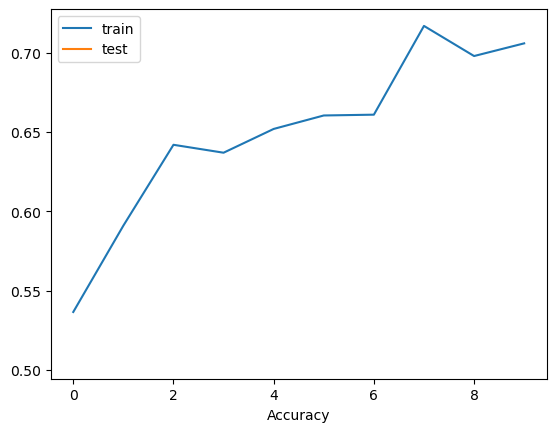

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

img_path = './PetImages/train/dog/999.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Accruacy:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 2us/step
Accruacy: [('n02106550', 'Rottweiler', 0.89674366), ('n02096051', 'Airedale', 0.10044312), ('n02094433', 'Yorkshire_terrier', 0.0005304744)]
